# A.3. Solutions

## Fixed Income Module

### DRW New-Hire Learning Program

#### Summer 2022

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu


### Instructions

#### Work on this in your group.
#### Don't spend more than 45 minutes on it during the 12-2pm break. (We want you to have time refresh and eat.)
#### We encourage you to do more on the problems in the afternoon/evening if able and interested.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

# 1 Yield Curve Movements

Use the yield curve time-series data in `'../data/yields.xlsx` to calculate the time-series of the **level**, **slope**, and curvature** factors.

## 1.1

Calculate the correlation matrix of the yields.

How similar are the yields.

## 1.2
Calculate the yield-curve factors. For each point in time, calculate the following three factors:

$\begin{align}
f^{\text{level}}_t =& \frac{1}{N_{\text{yields}}}\sum_{i=1}^{N_{\text{yields}}} y^{(i)}_t\\
f^{\text{slope}}_t =& y^{(30)}_t - y^{(1)}_t\\
f^{\text{curvature}}_t =& -y^{(1)}_t + 2 y^{(10)}_t - y^{(30)}_t
\end{align}$

Report the mean and volatility of each factor.

Report the correlation matrix of the factors.

# <span style="color:red">Solution 1</span>

In [2]:
filepath = '../data/yields.xlsx'
yields = pd.read_excel(filepath, sheet_name='yields')
yields.set_index('caldt',inplace=True)

shapes = pd.DataFrame(yields.mean(axis=1),columns=['level'])
shapes['slope'] = yields[30]-yields[1]
shapes['curvature'] = -yields[1] + 2 * yields[10] - yields[30]

DATETHRESH = '2010-01-01'
shapesT = shapes[shapes.index>DATETHRESH]

## 1.1

In [3]:
yields.corr()

,1,2,5,7,10,20,30
1,1.000000,0.994962,0.974130,0.961685,0.949029,0.913275,0.901515
2,0.994962,1.000000,0.989876,0.980856,0.969785,0.936723,0.926286
5,0.974130,0.989876,1.000000,0.997698,0.992238,0.968261,0.960583
7,0.961685,0.980856,0.997698,1.000000,0.996734,0.977498,0.971186
10,0.949029,0.969785,0.992238,0.996734,1.000000,0.984949,0.980059
20,0.913275,0.936723,0.968261,0.977498,0.984949,1.000000,0.996413
30,0.901515,0.926286,0.960583,0.971186,0.980059,0.996413,1.000000


### since 2010

In [4]:
yields.loc['2010':,:].corr()

,1,2,5,7,10,20,30
1,1.000000,0.980266,0.720742,0.513149,0.291916,-0.004610,-0.048813
2,0.980266,1.000000,0.821679,0.630086,0.404599,0.093160,0.042684
5,0.720742,0.821679,1.000000,0.953910,0.820876,0.565862,0.521074
7,0.513149,0.630086,0.953910,1.000000,0.950845,0.775949,0.741549
10,0.291916,0.404599,0.820876,0.950845,1.000000,0.930089,0.908083
20,-0.004610,0.093160,0.565862,0.775949,0.930089,1.000000,0.991830
30,-0.048813,0.042684,0.521074,0.741549,0.908083,0.991830,1.000000


## 1.2

In [5]:
shapes.describe()

,level,slope,curvature
count,15180.000000,15180.000000,15180.000000
mean,5.528077,1.169398,0.724851
std,2.950428,1.467322,0.939915
min,0.487603,-3.490292,-5.426753
25%,3.424308,0.079310,0.155082
50%,5.316840,1.066434,0.653781
75%,7.242041,2.172488,1.366707
max,15.259628,4.358273,3.283792


In [6]:
shapes.corr()

,level,slope,curvature
level,1.000000,-0.407054,-0.205379
slope,-0.407054,1.000000,0.623922
curvature,-0.205379,0.623922,1.000000


### since 2010

In [7]:
shapesT.describe()

,level,slope,curvature
count,3066.000000,3066.000000,3066.000000
mean,1.804177,2.221985,0.676974
std,0.578169,1.106769,0.702214
min,0.487603,0.145997,-0.785336
25%,1.427390,1.341848,0.203418
50%,1.823780,2.195635,0.571290
75%,2.131303,3.055193,1.142432
max,3.121686,4.358273,2.612146


In [8]:
shapesT.corr()

,level,slope,curvature
level,1.000000,0.088345,0.388268
slope,0.088345,1.000000,0.841944
curvature,0.388268,0.841944,1.000000


# 2 Calculating Duration

Use the data file `../data/treasury_quotes_2022-03-31.xlsx`.

This data reports duration as `TDDURATN`. It quotes the duration in days, so I recommend dividing by 365 to get the duration in its usual format.

## 2.1 
Set up the cashflow matrix. 

To do this, consider using the code in notebook A.3., for example. Or use your work from Assignment A.2., problem 3.

## 2.2
Build a discount curve assuming that the spot rate is 2\% per year, continuously compounded.

Plot the discount curve and the associated spot curve out to 30 years maturity.

## 2.3
For each treasury issue, calculate the duration as the weighted average of the (discounted!) cashflow maturity.

Report the summary statistics of the durations. (Use `.describe()` from pandas.)


## 2.4
How close are your duration estimates to the imputed durations given in the data source, (column `TDDURATN`)?

Report the summary statistics of the imputed durations minus your calculated durations from above.

Why might they be different?

## 2.5
Re-do 2.2-2.3, but this time for calculating convexity.

# <span style="color:red">Solution 2</span>

## 2.1

In [9]:
QUOTE_DATE = '2022-03-31'
filepath_rawdata = f'../data/treasury_quotes_{QUOTE_DATE}.xlsx'
rawdata = pd.read_excel(filepath_rawdata,sheet_name='quotes')
rawdata.columns = rawdata.columns.str.upper()
rawdata.sort_values('TMATDT',inplace=True)
rawdata.set_index('KYTREASNO',inplace=True)

t_check = rawdata['CALDT'].values[0]
if rawdata['CALDT'].eq(t_check).all():
    t_current = t_check
else:
    warnings.warn('Quotes are from multiple dates.')
    t_current = None

rawprices = (rawdata['TDBID'] + rawdata['TDASK'])/2 + rawdata['TDACCINT']
rawprices.name = 'price'

maturity_delta = get_maturity_delta(rawdata['TMATDT'],t_current)
maturity_delta.name = 'maturity delta'
display(f'Treasuries quoted on {QUOTE_DATE}.')

'Treasuries quoted on 2022-03-31.'

In [10]:
MODEL = nelson_siegel

RESTRICT_YLD = True
RESTRICT_TIPS = True

RESTRICT_DTS_MATURING = False
RESTRICT_REDUNDANT = False

data = filter_treasuries(rawdata, t_date=t_current, filter_yld = RESTRICT_YLD, filter_tips = RESTRICT_TIPS, drop_duplicate_maturities=RESTRICT_REDUNDANT)
CF = filter_treasury_cashflows(calc_cashflows(data),filter_maturity_dates=RESTRICT_DTS_MATURING)

CF

,2022-04-05,2022-04-07,2022-04-12,2022-04-14,2022-04-15,2022-04-19,2022-04-21,2022-04-26,2022-04-28,2022-04-30,...,2049-11-15,2050-02-15,2050-05-15,2050-08-15,2050-11-15,2051-02-15,2051-05-15,2051-08-15,2051-11-15,2052-02-15
KYTREASNO,,,,,,,,,,,,,,,,,,,,,
207809,100,0,0,0,0.000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
207772,0,100,0,0,0.000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
207810,0,0,100,0,0.000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
207784,0,0,0,100,0.000,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
207347,0,0,0,0,101.125,0,0,0,0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207680,0,0,0,0,0.000,0,0,0,0,0.0,...,0.0000,0.9375,0.0000,0.9375,0.0000,100.9375,0.0000,0.000,0.0000,0.000
207719,0,0,0,0,0.000,0,0,0,0,0.0,...,1.1875,0.0000,1.1875,0.0000,1.1875,0.0000,101.1875,0.000,0.0000,0.000
207763,0,0,0,0,0.000,0,0,0,0,0.0,...,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000,101.000,0.0000,0.000


## 2.2

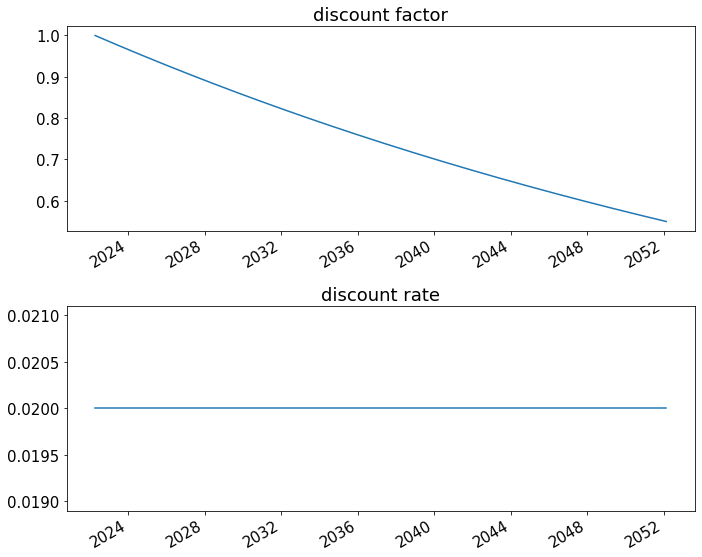

In [11]:
RATE = .02
maturity_grid = pd.Series(get_maturity_delta(CF.columns.values,t_current=t_current),index=CF.columns)
discount_factors = np.exp(-RATE * maturity_grid)

curves = pd.DataFrame(discount_factors,index=CF.columns, columns=['discount factor'])
curves['discount rate'] = RATE

fig,ax = plt.subplots(2,1,figsize=(10,8))
curves['discount factor'].plot(ax=ax[0],title='discount factor');
curves['discount rate'].plot(ax=ax[1],title = 'discount rate');
plt.tight_layout()

## 2.3

In [12]:
wts = CF.mul(curves['discount factor'],axis=1)
wts = wts.div(wts.sum(axis=1),axis=0)
duration = (wts @ maturity_grid.to_frame()).rename(columns={0:'duration'})

## 2.4

In [13]:
FREQ = 365
duration['errors'] = rawdata['TDDURATN']/FREQ  - duration['duration']

## 2.5

In [14]:
duration['convexity'] = wts @ maturity_grid**2

## Show answers

In [15]:
duration.describe()

,duration,errors,convexity
count,374.000000,374.000000,374.000000
mean,5.088481,-0.048804,71.709624
std,5.993975,0.115735,141.517890
min,0.013689,-0.438861,0.000187
25%,0.881738,-0.002180,0.778877
50%,2.750777,0.000356,7.684366
75%,5.936334,0.001103,36.862721
max,23.162596,0.002836,609.538979


# 3 Hedging Duration

Import `treasury_ts_issue_duration_(207392, 207391, 207457).xlsx`.

I suggest using code such as

* `tsdata = pd.read_excel(filepath_tsdata,sheet_name='ts')`

* `tsdata.columns = tsdata.columns.str.upper()`

* `px = tsdata.pivot_table(index='CALDT',columns='KYTREASNO',values='TDASK').dropna()`
* `duration = tsdata.pivot_table(index='CALDT',columns='KYTREASNO',values='TDDURATN').dropna()`

## 3.1 

Suppose you have a portfolio of 10,000 USD long in security `207391` on the last day of the sample.

If you want to manage interest rate exposure using duration, how large of a short position should you hold in `207392`?

(Duration is the column `TDDURATN` in the raw data.)

## 3.2

Step through the time-series, doing the following:

* Starting at the end of the first day, set the hedged position according to the relative given durations.
* Use the second day's price data to evaluate the net profit or loss of the hedged position.
* Reset the the hedged position using the end-of-second-day durations. Again fix the long position of security `207391` to be 10,000.
* Repeat throughout the timeseries.

Report 
* the total profit (or loss.)
* the mean, standard deviation, min, and max of the daily profit or loss.

# <span style="color:red">Solution 3</span>

In [16]:
filepath_tsdata = '../data/treasury_ts_issue_duration_(207392, 207391, 207457).xlsx'

info = pd.read_excel(filepath_tsdata,sheet_name='info').set_index('kytreasno')
info

,issue date,maturity date,coupon rate,security type
kytreasno,,,,
207392,2019-08-15,2049-08-15,2.250,1
207391,2019-08-15,2029-08-15,1.625,2
207457,2019-12-15,2022-12-15,1.625,2


In [17]:
SIZE = 10000
IDLONG = 207391
IDSHORT = 207392

FREQ = 365

In [18]:
tsdata = pd.read_excel(filepath_tsdata,sheet_name='ts')
tsdata.columns = tsdata.columns.str.upper()
px = tsdata.pivot_table(index='CALDT',columns='KYTREASNO',values='TDASK').dropna()
duration = tsdata.pivot_table(index='CALDT',columns='KYTREASNO',values='TDDURATN').dropna()/FREQ

In [19]:
position = pd.DataFrame(index=duration.index, dtype=float)

position['long'] = SIZE / px[IDLONG]
position['hedge ratio'] = (duration[IDLONG] / duration[IDSHORT]) * (px[IDLONG] / px[IDSHORT])
position['short'] = - position['hedge ratio'] * position['long']
position[['long ($)','short ($)']] = position[['long','short']] * px[[IDLONG,IDSHORT]].values

position['net ($)'] = position[['long ($)','short ($)']].sum(axis=1)
wts = position[['long ($)','short ($)']].div(position[['long ($)','short ($)']].sum(axis=1),axis=0)

### Check that duration is indeed hedged as of end of day

In [20]:
position['duration'] = (wts * duration[[IDLONG,IDSHORT]].values).sum(axis=1)
position['duration'].describe().to_frame().T.style.format('{:.1%}')

,count,mean,std,min,25%,50%,75%,max
duration,62100.0%,-0.0%,0.0%,-0.0%,-0.0%,0.0%,0.0%,0.0%


### Based on position at end of $t$, calculate  profit & loss at $t+1$

Note that this is not the true **profit** given that we are ignoring the coupons.

In [21]:
position[['long ($) realized','short ($) realized']] = \
    position[['long','short']] * px[[IDLONG,IDSHORT]].shift(-1).values

position[['long p&l','short p&l']] = \
    position[['long ($) realized','short ($) realized']] - position[['long ($)','short ($)']].values

position['profit hedged'] = position[['long p&l','short p&l']].sum(axis=1)

### Compare to profit of holding position unhedged

In [22]:
position['profit'] = px[IDLONG].diff() * position['long'].shift()

position[['profit','profit hedged']].describe()

,profit,profit hedged
count,620.000000,621.000000
mean,-0.901445,-0.387938
std,44.522339,18.782488
min,-321.110870,-98.317955
25%,-23.976482,-9.768293
50%,-1.279097,-0.075192
75%,21.955875,9.221656
max,276.189043,107.636148


In [23]:
position

,long,hedge ratio,short,long ($),short ($),net ($),duration,long ($) realized,short ($) realized,long p&l,short p&l,profit hedged,profit
CALDT,,,,,,,,,,,,,
2019-12-10,101.967657,0.406667,-41.466870,10000.0,-4132.432723,5867.567277,1.776357e-15,10044.610850,-4167.096434,44.610850,-34.663711,9.947139,NaN
2019-12-11,101.514791,0.404369,-41.049411,10000.0,-4125.145093,5874.854907,1.776357e-15,9911.174558,-4051.063734,-88.825442,74.081359,-14.744083,44.610850
2019-12-12,102.424582,0.409461,-41.938828,10000.0,-4138.838061,5861.161939,1.776357e-15,10062.414980,-4192.572184,62.414980,-53.734123,8.680857,-88.825442
2019-12-13,101.789264,0.405647,-41.290523,10000.0,-4127.761953,5872.238047,0.000000e+00,9960.238569,-4096.471478,-39.761431,31.290474,-8.470957,62.414980
2019-12-16,102.195609,0.407493,-41.643979,10000.0,-4131.538194,5868.461806,0.000000e+00,9988.822355,-4114.294984,-11.177645,17.243210,6.065565,-39.761431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-24,107.789474,0.374904,-40.410747,10000.0,-3450.383227,6549.616773,-1.776357e-15,10010.947368,-3456.381698,10.947368,-5.998470,4.948898,81.500976
2022-05-25,107.671602,0.374446,-40.317187,10000.0,-3448.379434,6551.620566,1.776357e-15,9999.158816,-3426.015994,-0.841184,22.363440,21.522255,10.947368
2022-05-26,107.680660,0.377306,-40.628541,10000.0,-3452.473767,6547.526233,-1.776357e-15,9995.793724,-3464.217954,-4.206276,-11.744188,-15.950463,-0.841184


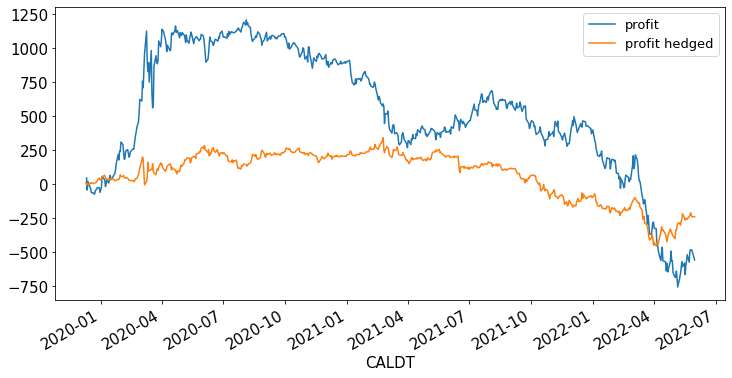

In [24]:
position[['profit','profit hedged']].cumsum().plot();

In [25]:
position[['profit','profit hedged']].describe().drop(index=['count']).style.format('${:,.2f}')

,profit,profit hedged
mean,$-0.90,$-0.39
std,$44.52,$18.78
min,$-321.11,$-98.32
25%,$-23.98,$-9.77
50%,$-1.28,$-0.08
75%,$21.96,$9.22
max,$276.19,$107.64


# 4 Factor Duration

Calculate the factor duration of the treasuries from `treasury_ts_issue_duration_(207392, 207391, 207457).xlsx`.

Run a multivariate regression of the bond prices on all three factors constructed above from the yield factors: level, slope, and curvature. 

Estimate the regression in the form of day-over-day differences for both bond prices and factors. (ht Shreyas.) That is, we are using regression to approximate the factor duration equation,

$\begin{align}
\frac{dP}{P} = \beta_1 dz_1 + \beta_2 dz_2 + \beta_3 dz_3 + \epsilon
\end{align}$

Report the betas for each of these factors, for each of the bond prices.

# <span style="color:red">Solution 4</span>

Note that it makes little difference whether an intercept is included in this regression, and either is defensible. For the standardized version below, it will make no difference.

In [26]:
dp_pct = px.pct_change().dropna()
dfac = shapes.diff().dropna()
dp_pct, dfac = dp_pct.align(dfac,join='inner',axis=0)

factor_durations = pd.DataFrame(-LinearRegression(fit_intercept=True).fit(dfac,dp_pct).coef_, columns = dp_pct.columns, index= dfac.columns)
factor_durations

KYTREASNO,207391,207392,207457
level,0.084272,0.008014,0.011436
slope,0.220327,0.130939,-0.072384
curvature,0.015225,-0.002172,-0.000404


### try standardizing the factors
The way we constructed level, slope, curvature, they may each have very different scalings (magnitudes,) which makes their betas hard to interpret. Easier to normalize them with a z-score, so that the resulting betas can be interpreted as the reaction to a one-sigma move in the factor.

In [27]:
def zscore(df):
    z = df.sub(df.mean(axis=0)).div(df.std(axis=0))
    return z

dz = zscore(dfac)

z_durations = pd.DataFrame(-LinearRegression(fit_intercept=True).fit(dz,dp_pct).coef_, columns = dp_pct.columns, index= dz.columns)
z_durations

KYTREASNO,207391,207392,207457
level,0.003536,0.000456,0.000604
slope,0.009246,0.007448,-0.003823
curvature,0.000639,-0.000124,-0.000021


***

# Extra Problems

## 1 Extracted Discount Curve

Re-do the duration and convexity calculations of Problem 2, this time using an extracted discount curve instead of a discount curve based on a constant (arbitrary) spot rate. 

## 2 PCAs
Re-do the factor duration of Problem 3 using PCA extracted factors instead of the ad-hoc factors.

## 3 Hedging Factor Duration

Explain how to build a factor-hedged position with these betas.